#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=457bcbb7f611e10f90c8d08ddda8267022d157bf9d7b26db2e074d1fe8736186
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [8]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


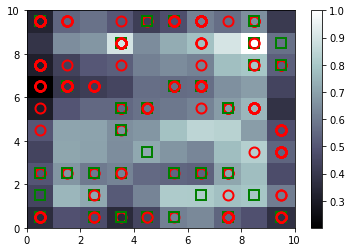

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [17]:
mappings = som.win_map(X)
fraud = np.concatenate((mappings[(8,8)], mappings[(3,8)]), axis = 0)
fraud = sc.inverse_transform(fraud)

##Printing the Fraunch Clients

In [23]:
print('Fraud Customer IDs')
for i in fraud[:, 0]:
  print(int(i))

Fraud Customer IDs
15692137
15676909
15658504
15739548
15699839
15706762
15783883
15756538
15651868
15801473
15728523
15716082
15646594
15672637
15794204
15734008
15757434
15769548
15752344
15736533
15673907
15737909
15779207
15711299
15752578
15636454
15805261


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [24]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [26]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in fraud:
    is_fraud[i]=1

count=0
for i in is_fraud:
  if i == 1:
    count+=1
print(count)

27


#Part 3 - ANN

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
tf.__version__

'2.2.0'

## Initializing the ANN

In [37]:

classifier=Sequential()

##Adding the input layer and the first hidden layer

In [40]:
classifier.add(Dense(units=2,kernel_initializer ='uniform',activation = 'relu',input_dim=15))

## Adding the output layer

In [41]:
classifier.add(Dense(units=1,kernel_initializer ='uniform',activation = 'sigmoid'))

## Training the ANN

## Compiling the ANN

In [43]:
classifier.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

## Training the ANN on the Training set

In [46]:
classifier.fit(customers, is_fraud, batch_size =1, epochs =4)

Epoch 1/4
690/690 [==============================] - 1s 1ms/step - loss: 0.0982 - accuracy: 0.9609
Epoch 2/4
690/690 [==============================] - 1s 999us/step - loss: 0.0937 - accuracy: 0.9609
Epoch 3/4
690/690 [==============================] - 1s 969us/step - loss: 0.0894 - accuracy: 0.9609
Epoch 4/4
690/690 [==============================] - 1s 1ms/step - loss: 0.0863 - accuracy: 0.9609


## Predicting probabilities of fraud

In [51]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)
y_pred = y_pred[y_pred[:,1].argsort()]